# 2.1
## Calcolare integrale 1D tramite MonteCarlo con due campionamenti diversi
## Spiegazione programma 2_1.cpp
Inizialmente c'è la lettura dell'input usando il file **"1.in"**, dove vengono letti numero di blocchi e lunghezza di blocco.  
Successivamente, ci sono two nested do loops, il primo sui blocchi, il secondo sugli step del blocco.  
Nel ciclo più interno viene chiamata la funzione "Accumulate", dove avviene campionamento e accumulo delle variabili di blocco.    
Nell' Importance of Sampling il coseno è stato sviluppato al quart'ordine.  
Alla fine del blocco, nella routine Averages vengono scritte medie ed errori sui file "**1unif.out**" e "**1is.out**". 

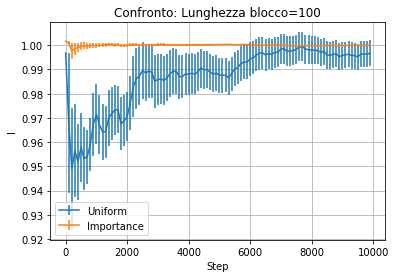

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

nblk = 100
L = 100

ave = np.zeros(nblk)    #Media di blocco
err = np.zeros(nblk)    #Quadrato della media di blocco
file_data = np.loadtxt('1unif.out', usecols=(0,1,2,3))
ave = file_data[:,2]
err = file_data[:,3]

ave2 = np.zeros(nblk)    #Media di blocco
err2 = np.zeros(nblk)    #Quadrato della media di blocco

file_data2 = np.loadtxt('1is.out', usecols=(0,1,2,3))
ave2 = file_data2[:,2]
err2 = file_data2[:,3]

x = np.arange(nblk)
x *= L
plt.errorbar(x,ave,yerr=err)
plt.errorbar(x,ave2,yerr=err2)
plt.title('Confronto: Lunghezza blocco=100')
plt.ylabel('I')
plt.xlabel('Step')
plt.legend(['Uniform', 'Importance'], loc='best')
plt.grid(True)
plt.savefig('./Pictures/Confronto.png', dpi=300)
plt.show()

<img src="./Pictures/Confronto.png" alt="Drawing" style="width: 500px;"/>
Dal grafico si vede che il risultato ottenuto con il campionamento uniforme ha un grande drift iniziale per poi convergere al valore, il drift nel caso del Importance of Sampling è più piccolo. E' quindi, evidente la maggior precisione del secondo metodo.

# 2.2
## Random Walk 3D
## Spiegazione del programma 2_2.cpp
Inizialmente c'è la lettura degli input dal file **"2.in"**, in particolare c'è la lettura di **key**, che se uguale a 0 si fa RW su reticolo altrimenti RW lungo direzione casuale.   
Il main è costituito da tre cicli, li elenco in ordine:
- ciclo sui blocchi
- ciclo sugli step di blocco
- ciclo sugli step del random walk

Nel ciclo più interno viene chiamata la routine "Move", dove viene campionata la nuova posizione del RW.  
Per ogni step del RW c'è l'accumulo $\sqrt{<r_N^2>_{RW}}$    e alla fine di ogni blocco c'è l'accumulo delle variabili globali attraverso la routine Averages.  
Alla fine, i valori finali di $\sqrt{<r_N^2>_{RW}}$ vengono scritti sul file **"rw.out"** . 

Parameters:
[0.98528956 0.50387103]


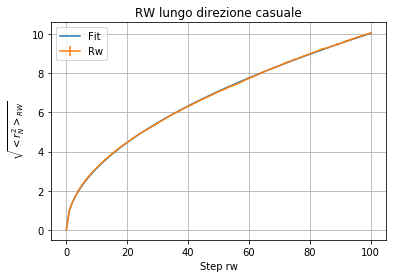

In [14]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
import matplotlib.pyplot as plt

def f(x,a,b):  # defining the fitting function
    return a * x**b

M = 101

x = np.arange(M)
ave = np.zeros(M)    #Media di blocco
err = np.zeros(M)    #Quadrato della media di blocco
file_data = np.loadtxt('rw_rndir.out', usecols=(0,1,2))
ave = file_data[:,1]
err = file_data[:,2]

#Fitting
p_opt, p_cov = curve_fit(f, x, ave)
print("Parameters:")
print(p_opt)
y_fit = f(x,p_opt[0],p_opt[1])

plt.plot(x,y_fit)
plt.errorbar(x,ave,yerr=err)
plt.title('RW lungo direzione casuale')
plt.ylabel(' $\sqrt{<r_N^2>_{RW}}$')
plt.xlabel('Step rw')
plt.legend(['Fit', 'Rw'], loc='best')
plt.grid(True)
#plt.savefig('./Pictures/Rw_rndir.png', dpi=300)
plt.show()


# 10000 lanci, passo reticolare a =1
Il fit è stato fatto con una funzione del tipo:  
$f(x) = a  x^b$  
dove a e b sono i parametri da determinare.  
## Random walk su un reticolo
<img src="./Pictures/Rw_lattice.png" alt="Drawing" style="width: 500px;"/>  
a = 1.71227997

b = 0.50184713

Il parametro b indica la presenza di un andamento diffusivo, ovvero del tipo $k  \sqrt{N}$
##  Random walk lungo una direzione casuale
<img src="./Pictures/Rw_rndir.png" alt="Drawing" style="width: 500px;"/>
a = 0.98528956  

b = 0.50387103

Il parametro b indica la presenza di un andamento diffusivo, ovvero del tipo $k * \sqrt{N}$